In [1]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
import mplhep as hep
hep.styles.use("ROOT")
from tqdm import tqdm, trange

In [47]:
ntuple_fname = "/home/jierans/work/eos/EosSimulations/pbomb_515nm_no_dichroicon.ntuple.root"
events = uproot.open(ntuple_fname)['output']
meta = uproot.open(ntuple_fname)['meta']

pmtinfo = {}
pmtx = meta['pmtX'].array(library='numpy')[0]
pmty = meta['pmtY'].array(library='numpy')[0]
pmtz = meta['pmtZ'].array(library='numpy')[0]
pmtu = meta['pmtU'].array(library='numpy')[0]
pmtv = meta['pmtV'].array(library='numpy')[0]
pmtw = meta['pmtW'].array(library='numpy')[0]
pmtid = meta['pmtId'].array(library='numpy')[0]
pmttype = meta['pmtType'].array(library='numpy')[0]
pmt_lcn = meta['pmtChannel'].array(library='numpy')[0]

pmt_pos = np.stack([pmtx, pmty, pmtz], axis=1)
pmt_dir = np.stack([pmtu, pmtv, pmtw], axis=1)

pmtinfo['pos'] = pmt_pos
pmtinfo['dir'] = pmt_dir
pmtinfo['id'] = pmtid
pmtinfo['type'] = pmttype
pmtinfo['lcn'] = pmt_lcn


nodichroicon_all_digitid = ak.to_numpy(ak.flatten(events['digitPMTID'].array()))
nodichroicon_all_lcn = pmtinfo['lcn'][nodichroicon_all_digitid]
nodichroicon_all_digitCharge = ak.to_numpy(ak.flatten(events['digitCharge'].array()))
nodichroicon_all_digitTime = ak.to_numpy(ak.flatten(events['digitTime'].array()))
nodichroicon_all_fit_times = ak.to_numpy(ak.flatten(events['fitTime'].array()))
nodichroicon_all_fit_peaks = ak.to_numpy(ak.flatten(events['fitPeak'].array()))
nodichroicon_all_fit_baseline = ak.to_numpy(ak.flatten(events['fitBaseline'].array()))
nodichroicon_all_ncrossings = ak.to_numpy(ak.flatten(events['digitNCrossings'].array()))
nodichroicon_all_trigtime = ak.to_numpy(ak.flatten(events['digitLocalTriggerTime'].array()))
nodichroicon_all_mcpmtid = ak.to_numpy(ak.flatten(events['mcPMTID'].array()))
nodichroicon_all_mcpmtnpe = ak.to_numpy(ak.flatten(events['mcPMTNPE'].array())) 

nodichroicon_mchit_per_lcn = {}
for pmtid in np.unique(nodichroicon_all_mcpmtid):
    pmtlcn = pmtinfo['lcn'][pmtid]
    nodichroicon_mchit_per_lcn[pmtlcn] = np.sum(nodichroicon_all_mcpmtnpe[nodichroicon_all_mcpmtid == pmtid])

nodichroicon_clean_hit_mask = \
    (nodichroicon_all_digitCharge < 9000) & \
    (nodichroicon_all_digitCharge > 0) & \
    (nodichroicon_all_ncrossings != 0) & \
    (nodichroicon_all_fit_times < 200) & \
    (nodichroicon_all_fit_times > 10.5) & \
    (nodichroicon_all_fit_peaks < 300) & \
    (nodichroicon_all_fit_peaks > 10)

tof = np.linalg.norm(pmtinfo['pos'], axis=1) / 300 * 1.34


In [48]:
ntuple_fname = "/home/jierans/work/eos/EosSimulations/pbomb_515nm.ntuple.root"
events = uproot.open(ntuple_fname)['output']
meta = uproot.open(ntuple_fname)['meta']

pmtinfo = {}
pmtx = meta['pmtX'].array(library='numpy')[0]
pmty = meta['pmtY'].array(library='numpy')[0]
pmtz = meta['pmtZ'].array(library='numpy')[0]
pmtu = meta['pmtU'].array(library='numpy')[0]
pmtv = meta['pmtV'].array(library='numpy')[0]
pmtw = meta['pmtW'].array(library='numpy')[0]
pmtid = meta['pmtId'].array(library='numpy')[0]
pmttype = meta['pmtType'].array(library='numpy')[0]
pmt_lcn = meta['pmtChannel'].array(library='numpy')[0]

pmt_pos = np.stack([pmtx, pmty, pmtz], axis=1)
pmt_dir = np.stack([pmtu, pmtv, pmtw], axis=1)

pmtinfo['pos'] = pmt_pos
pmtinfo['dir'] = pmt_dir
pmtinfo['id'] = pmtid
pmtinfo['type'] = pmttype
pmtinfo['lcn'] = pmt_lcn


dichroicon_all_digitid = ak.to_numpy(ak.flatten(events['digitPMTID'].array()))
dichroicon_all_lcn = pmtinfo['lcn'][dichroicon_all_digitid]
dichroicon_all_digitCharge = ak.to_numpy(ak.flatten(events['digitCharge'].array()))
dichroicon_all_fit_times = ak.to_numpy(ak.flatten(events['fitTime'].array()))
dichroicon_all_fit_peaks = ak.to_numpy(ak.flatten(events['fitPeak'].array()))
dichroicon_all_fit_baseline = ak.to_numpy(ak.flatten(events['fitBaseline'].array()))
dichroicon_all_ncrossings = ak.to_numpy(ak.flatten(events['digitNCrossings'].array()))
dichroicon_all_trigtime = ak.to_numpy(ak.flatten(events['digitLocalTriggerTime'].array()))
dichroicon_all_mcpmtid = ak.to_numpy(ak.flatten(events['mcPMTID'].array()))
dichroicon_all_mcpmtnpe = ak.to_numpy(ak.flatten(events['mcPMTNPE'].array())) 

dichroicon_mchit_per_lcn = {}
for pmtid in np.unique(nodichroicon_all_mcpmtid):
    pmtlcn = pmtinfo['lcn'][pmtid]
    dichroicon_mchit_per_lcn[pmtlcn] = np.sum(dichroicon_all_mcpmtnpe[dichroicon_all_mcpmtid == pmtid])

dichroicon_clean_hit_mask = \
    (dichroicon_all_digitCharge < 9000) & \
    (dichroicon_all_digitCharge > 0) & \
    (dichroicon_all_ncrossings != 0) & \
    (dichroicon_all_fit_times < 200) & \
    (dichroicon_all_fit_times > 10.5) & \
    (dichroicon_all_fit_peaks < 300) & \
    (dichroicon_all_fit_peaks > 10)


(255.0, 269.0)

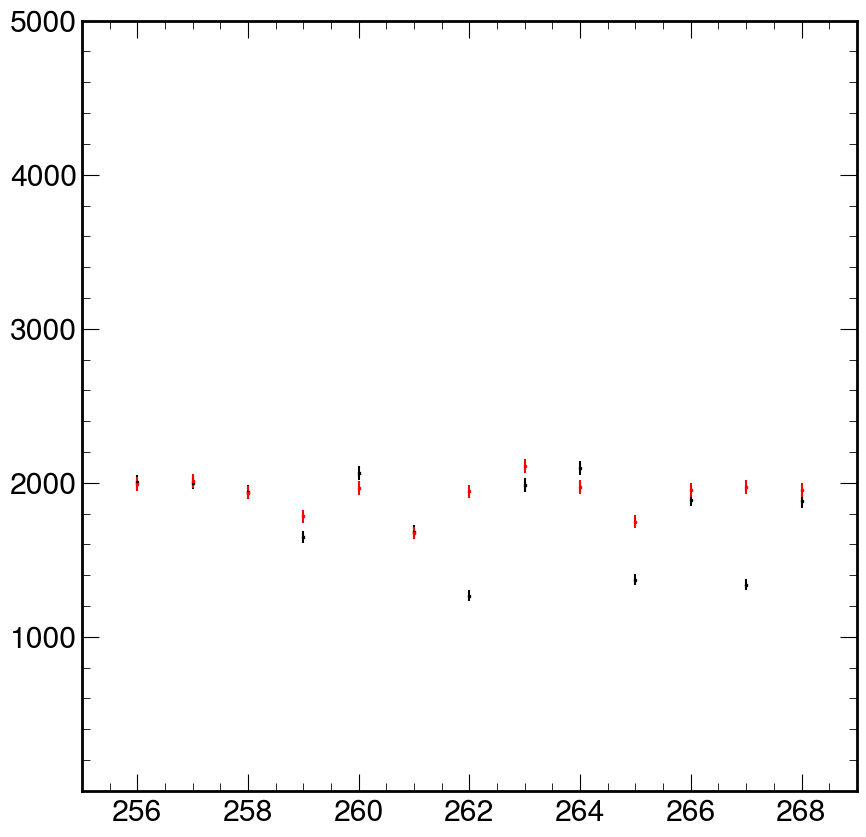

In [50]:
dichroicon_mcpmtnpes = np.zeros(300)
for pmtid, npe in zip(dichroicon_all_mcpmtid, dichroicon_all_mcpmtnpe):
    pmtlcn = pmtinfo['lcn'][pmtid]
    dichroicon_mcpmtnpes[pmtlcn] += 1

plt.errorbar(np.arange(300), dichroicon_mcpmtnpes, yerr=np.sqrt(dichroicon_mcpmtnpes), fmt='ks', markersize=2)

nodichroicon_mcpmtnpes = np.zeros(300)
for pmtid, npe in zip(nodichroicon_all_mcpmtid, nodichroicon_all_mcpmtnpe):
    pmtlcn = pmtinfo['lcn'][pmtid]
    nodichroicon_mcpmtnpes[pmtlcn] += 1
plt.ylim(bottom=1, top=5000)
plt.errorbar(np.arange(300), nodichroicon_mcpmtnpes, yerr=np.sqrt(nodichroicon_mcpmtnpes), fmt='rs', markersize=2)
plt.xlim(255, 269)


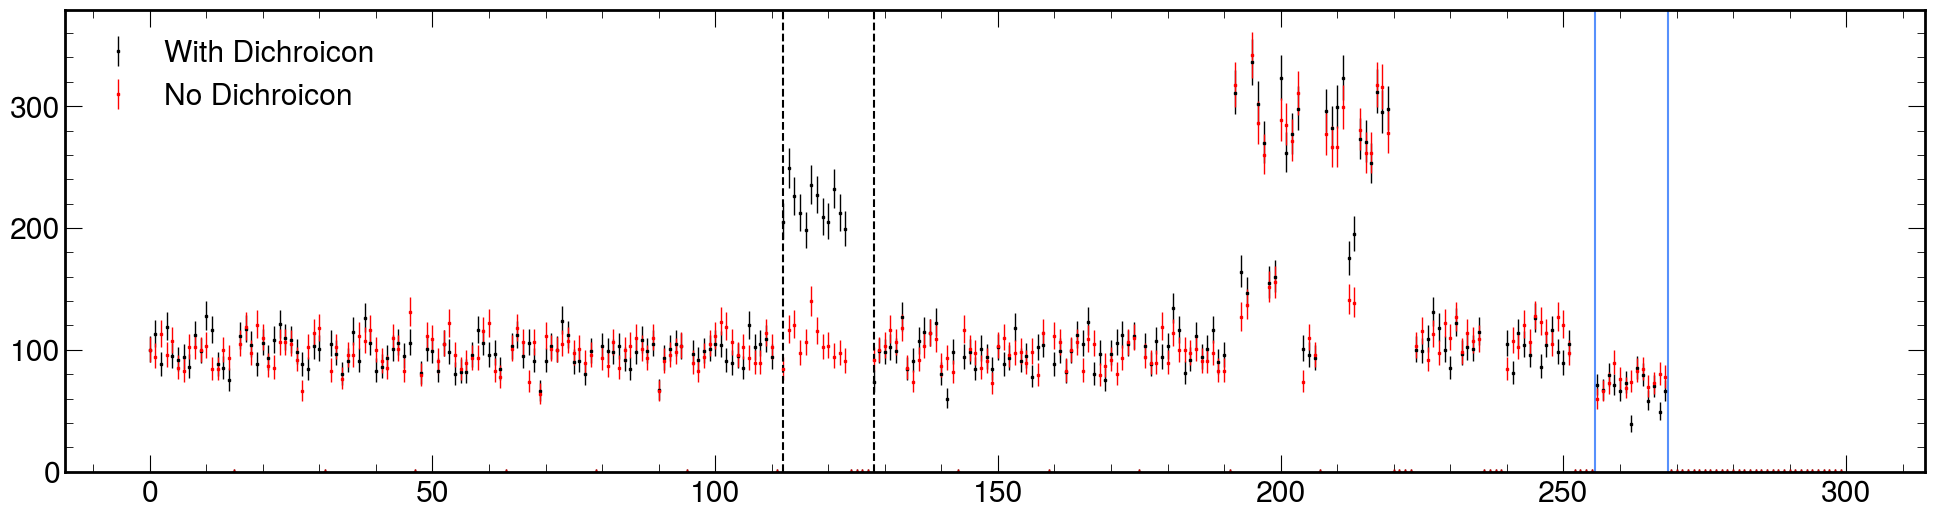

In [27]:
plt.figure(figsize=(24, 6))
# plt.xlim(255, 269)

dichroicon_hit_per_lcn = np.histogram(dichroicon_all_lcn[dichroicon_clean_hit_mask], bins=np.arange(-0.5, 300, 1))
nodichroicon_hit_per_lcn = np.histogram(nodichroicon_all_lcn[nodichroicon_clean_hit_mask], bins=np.arange(-0.5, 300, 1))
normalization_ratio = np.mean(dichroicon_hit_per_lcn[0][:100]) / np.mean(nodichroicon_hit_per_lcn[0][:100])
nodichroicon_hit_per_lcn = (normalization_ratio * nodichroicon_hit_per_lcn[0], nodichroicon_hit_per_lcn[1])

hep.histplot(dichroicon_hit_per_lcn, 
             histtype='errorbar', yerr=True, marker='s', markersize=2, color='k', label='With Dichroicon')
hep.histplot(nodichroicon_hit_per_lcn, 
             histtype='errorbar', yerr=True, marker='s', markersize=2, color='r', label='No Dichroicon')
plt.axvline(7*16, color='k', linestyle='--')
plt.axvline(8*16, color='k', linestyle='--')
plt.legend()
plt.axvline(255.5)
plt.axvline(268.5)
plt.show()

/tmp/ipykernel_628121/2047300261.py:1: RuntimeWarning: invalid value encountered in divide
  rly = dichroicon_hit_per_lcn[0] / nodichroicon_hit_per_lcn[0]


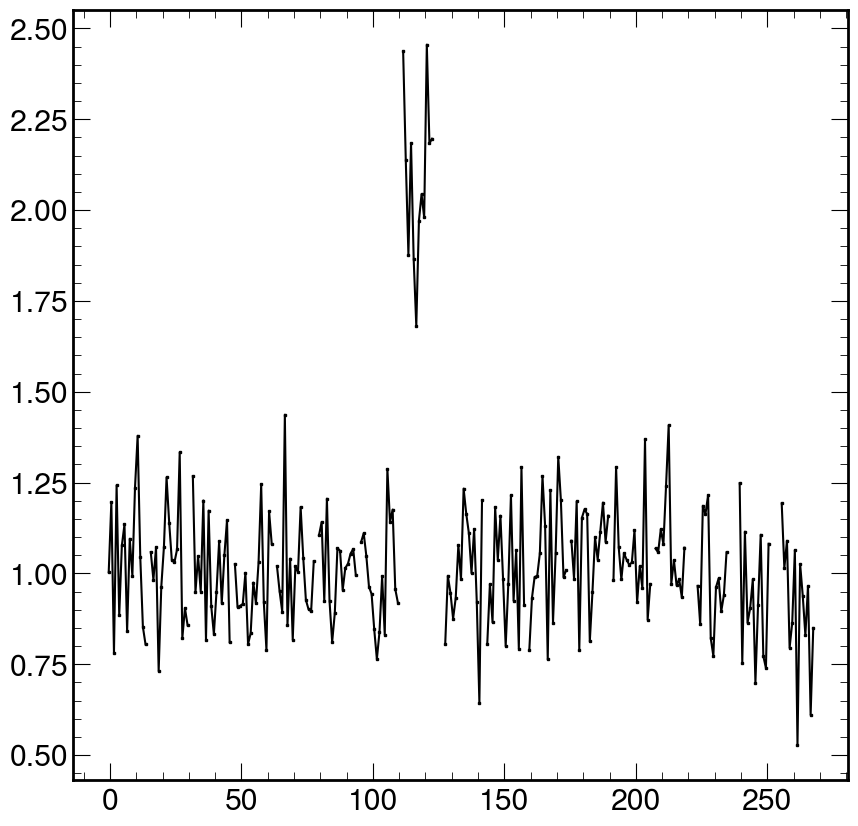

In [24]:
rly = dichroicon_hit_per_lcn[0] / nodichroicon_hit_per_lcn[0]
plt.plot(dichroicon_hit_per_lcn[1][:-1], rly, 'ks-', markersize=2)

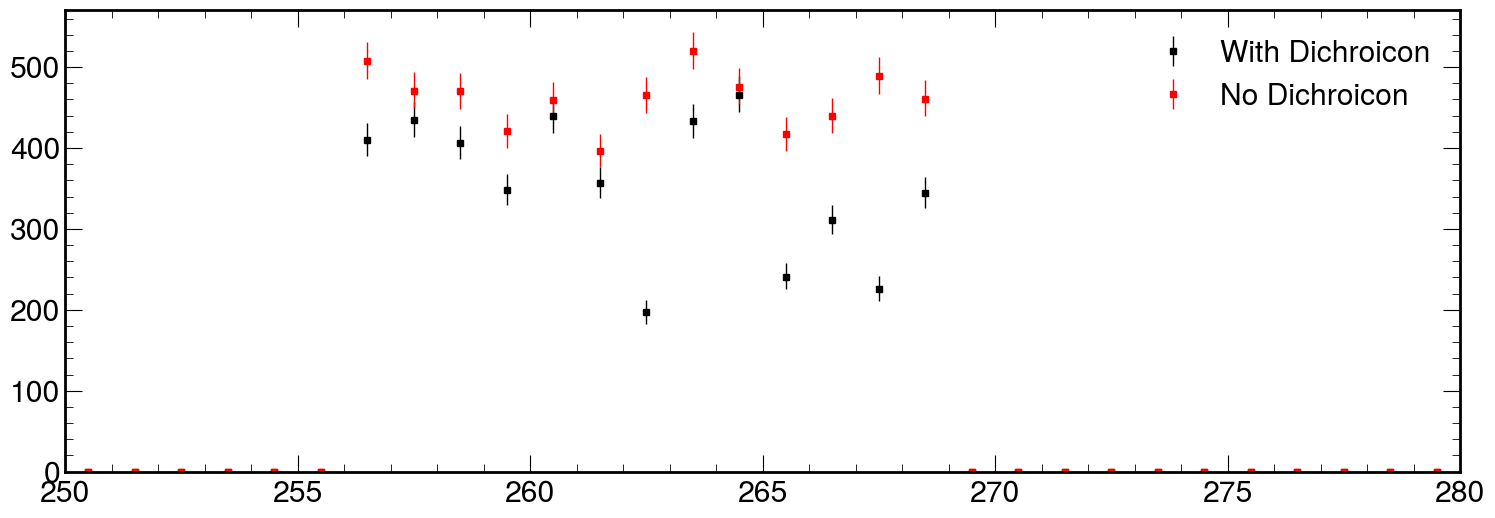

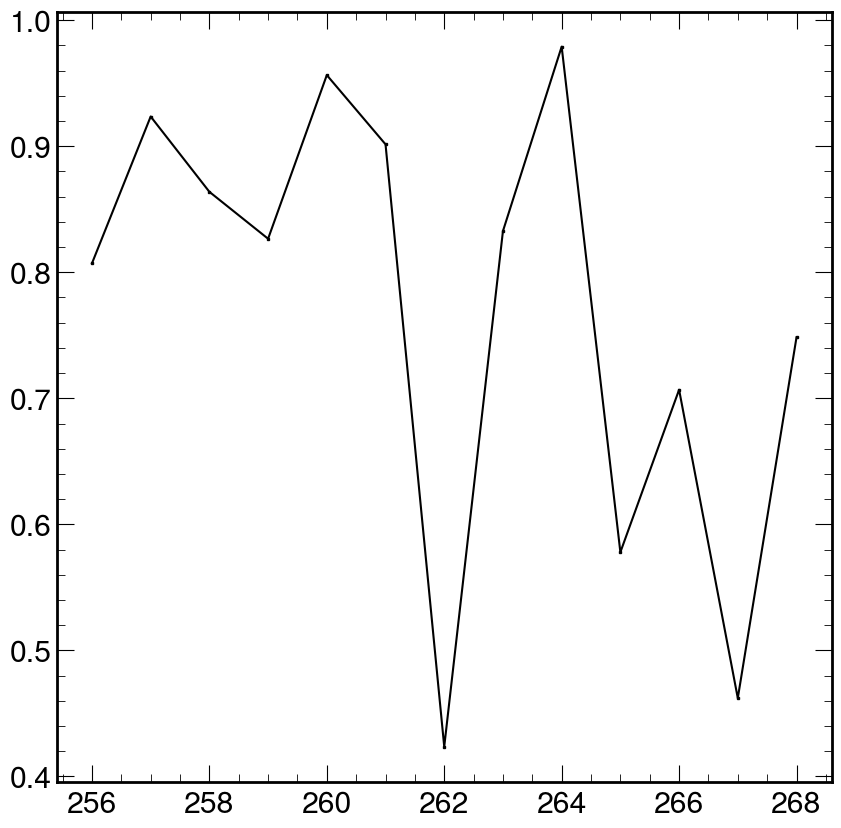

In [26]:
plt.figure(figsize=(18, 6))
mask = dichroicon_clean_hit_mask & (pmtinfo['type'][dichroicon_all_digitid] == 3)
hep.histplot(np.histogram(dichroicon_all_lcn[mask], bins=np.arange(300)), 
             histtype='errorbar', yerr=True, marker='s', markersize=4, color='k', density=False, label='With Dichroicon')
mask = nodichroicon_clean_hit_mask & (pmtinfo['type'][nodichroicon_all_digitid] == 3)

hep.histplot(np.histogram(nodichroicon_all_lcn[mask], bins=np.arange(300)), 
             histtype='errorbar', yerr=True, marker='s', markersize=4, color='r', density=False, label='No Dichroicon')
plt.legend()
plt.xlim(250, 280)
plt.show()
plt.figure()
lcns_of_interest = pmtinfo['lcn'][pmtinfo['type'] == 3]
plt.plot(dichroicon_hit_per_lcn[1][lcns_of_interest], rly[lcns_of_interest], 'ks-', markersize=2)

(254.0, 270.0)

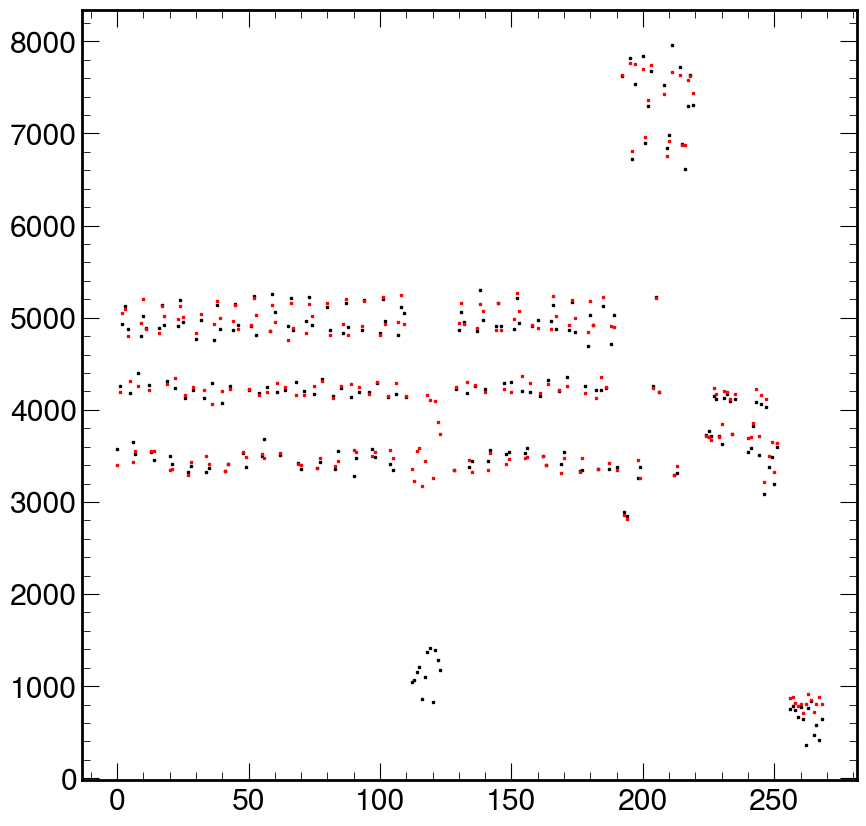

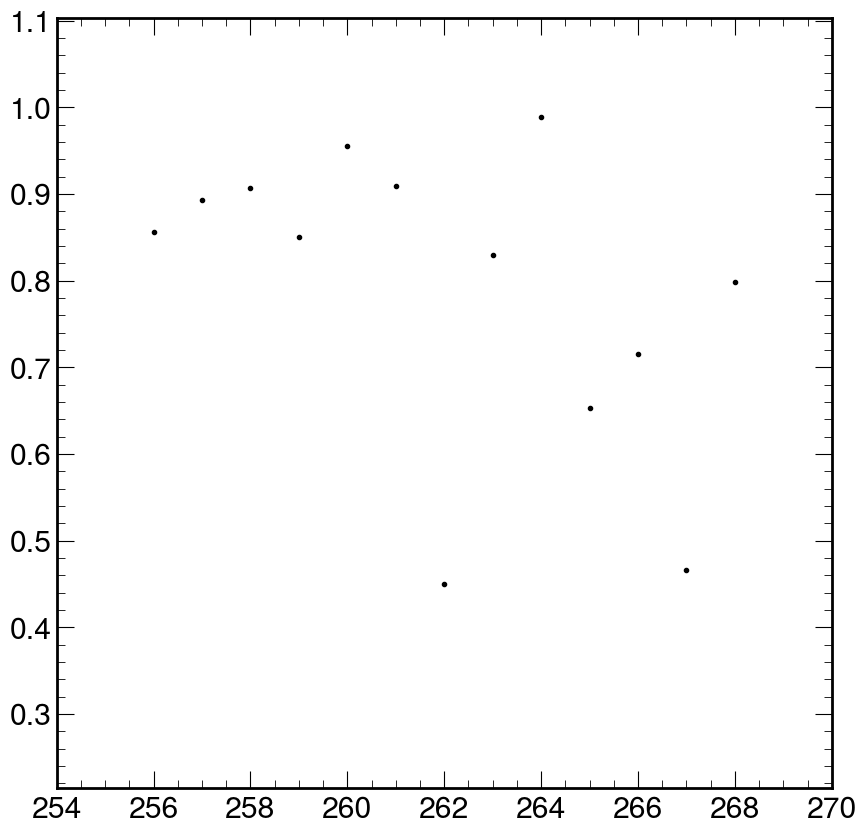

In [43]:
plt.plot(dichroicon_mchit_per_lcn.keys(), dichroicon_mchit_per_lcn.values(), 'ks', markersize=2, label = "With Dichroicon")
plt.plot(nodichroicon_mchit_per_lcn.keys(), nodichroicon_mchit_per_lcn.values(), 'rs', markersize=2, label = "No Dichroicon")
plt.figure()
rly_mc = np.array(list(dichroicon_mchit_per_lcn.values())) / np.array(list(nodichroicon_mchit_per_lcn.values()))
plt.plot(np.array(list(dichroicon_mchit_per_lcn.keys())), rly_mc, 'k.')
plt.xlim(np.min(lcns_of_interest) - 2, np.max(lcns_of_interest) + 2)

In [42]:
np.array(list(dichroicon_mchit_per_lcn.keys()))

array([224, 112, 225, 226, 113, 227, 228, 114, 229, 230, 231, 115, 232,
       233, 116, 234, 117, 235, 240, 118, 241, 242, 243, 244, 119, 245,
       246, 120, 121, 247, 248, 122, 249, 250, 123, 251, 256, 257, 258,
       259, 260, 261, 262, 263, 264, 265, 266, 267, 268,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14, 184,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30, 185,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46, 186,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62, 187,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78, 188,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94, 189,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 190, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 204, 144, 145, 146, 14

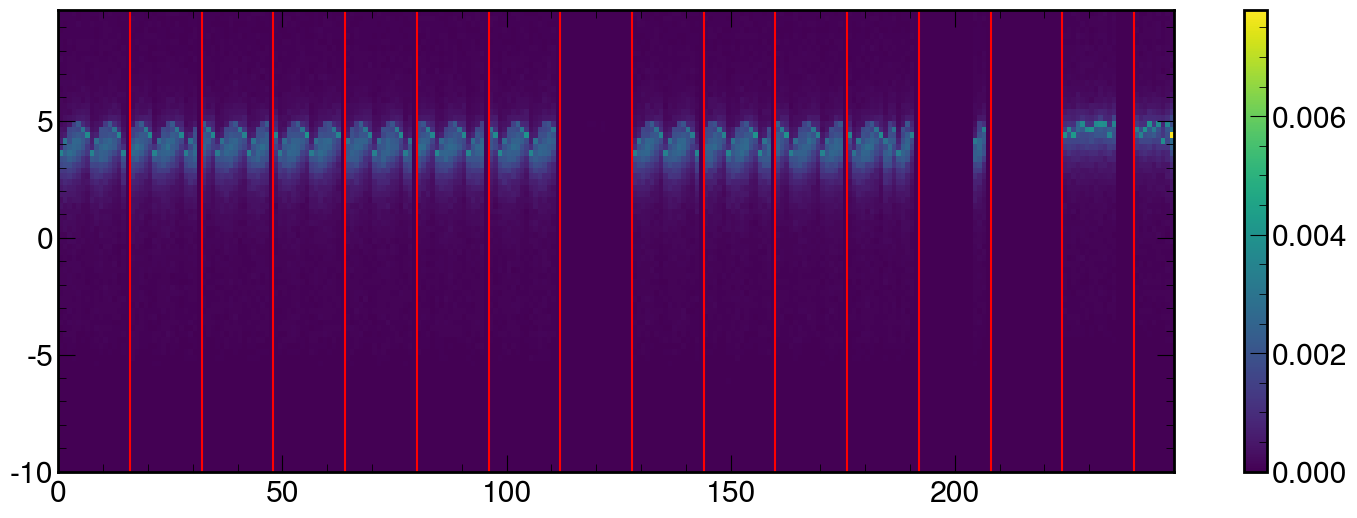

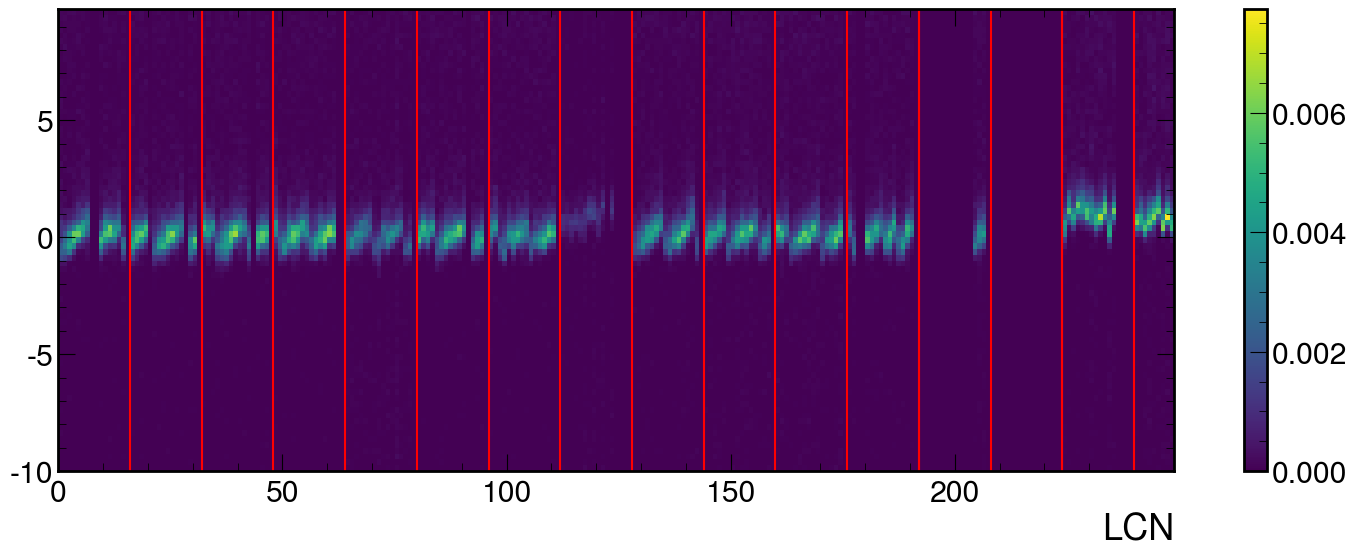

In [176]:
plt.figure(figsize=(18, 6))
sim_all_fit_times_corrected = sim_all_fit_times - 60 - tof[sim_all_digitid]
sim_8in = sim_clean_hit_mask & ((pmtinfo['type'][sim_all_digitid] == 0) | (pmtinfo['type'][sim_all_digitid] == 1))
plt.hist2d(sim_all_lcn[sim_8in], sim_all_fit_times_corrected[sim_8in], bins=(np.arange(250), np.arange(-10, 10, 0.25)), density=True)
for bid in range(16):
    plt.axvline(bid*16, color='r')

plt.colorbar()

data_all_fit_times_corrected = data_all_fit_times - np.asarray(CABLE_DELAYS)[data_all_lcn] - tof[data_all_digitid] - 10.5
data_8in = data_clean_hit_mask & ((pmtinfo['type'][data_all_digitid] == 0) | (pmtinfo['type'][data_all_digitid] == 1))
plt.figure(figsize=(18, 6))
plt.hist2d(data_all_lcn[data_8in], data_all_fit_times_corrected[data_8in], 
           bins=(np.arange(250), np.arange(-10, 10, 0.25)), density=True)
plt.colorbar()
# for lcn, delay in enumerate(CABLE_DELAYS):
#     plt.hlines(delay, lcn, lcn+1, color='r')
plt.axvline(16*12, color='r')
plt.axvline(16*14, color='r')
for bid in range(16):
    plt.axvline(bid*16, color='r')
plt.xlabel("LCN")
plt.show()

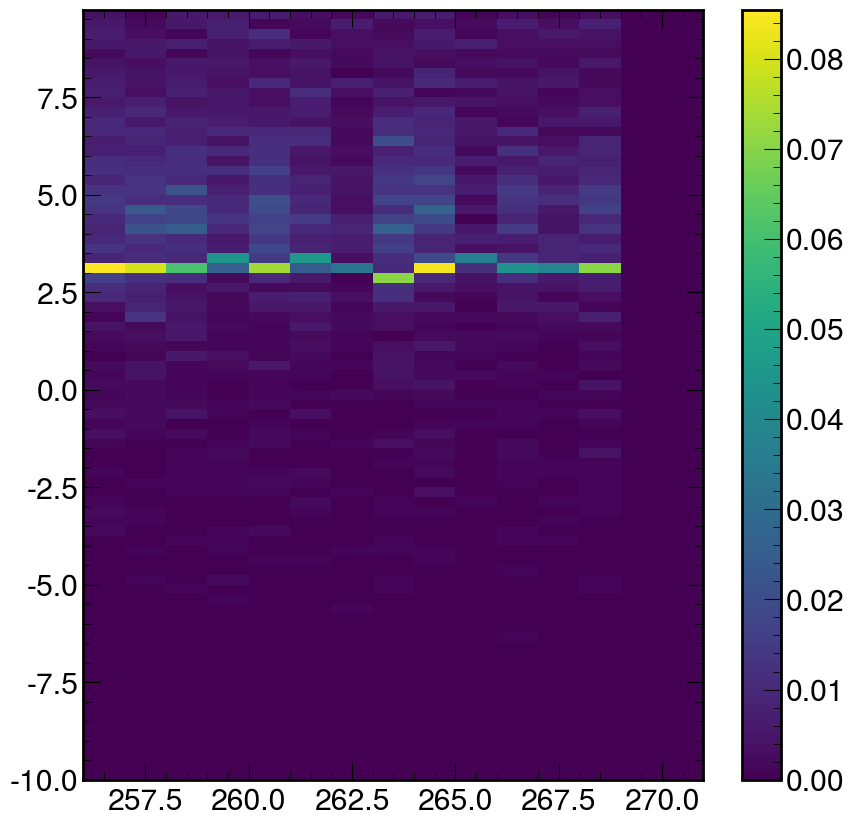

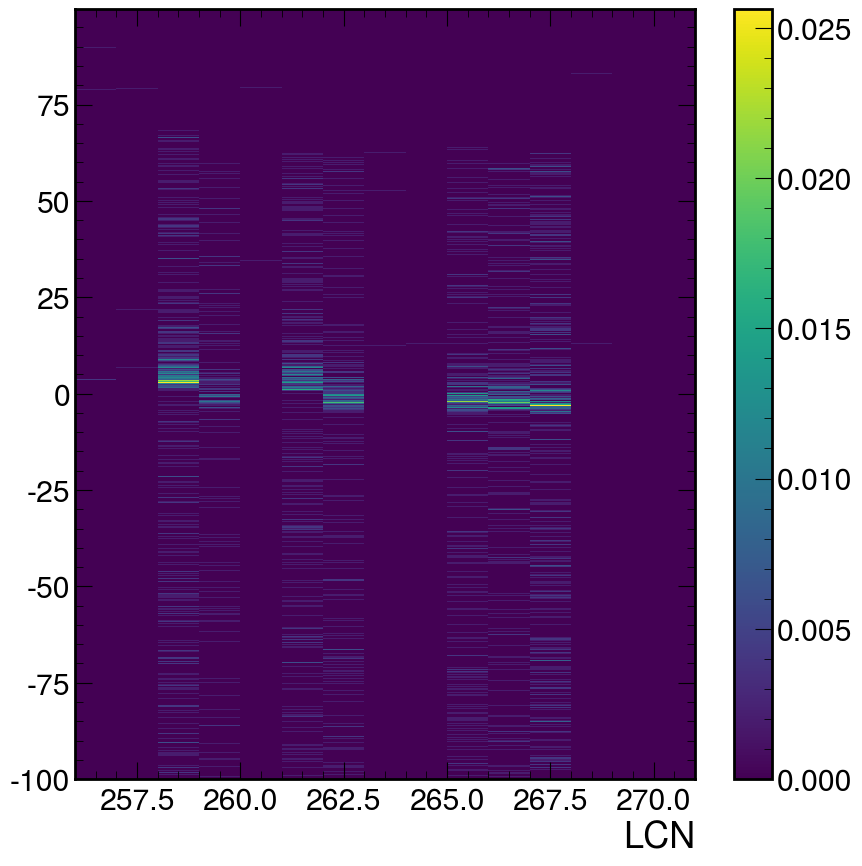

In [205]:
# plt.figure(figsize=(18, 6))
sim_all_fit_times_corrected = sim_all_fit_times - 60 - tof[sim_all_digitid]
sim_10in = sim_clean_hit_mask & (pmtinfo['type'][sim_all_digitid] == 3)
plt.hist2d(sim_all_lcn[sim_10in], sim_all_fit_times_corrected[sim_10in], bins=(np.arange(16*16, 17*16), np.arange(-10, 10, 0.25)), density=True)
for bid in range(18):
    plt.axvline(bid*16, color='r')

plt.colorbar()

data_all_fit_times_corrected = data_all_digitTime - np.asarray(CABLE_DELAYS)[data_all_lcn] - tof[data_all_digitid] - 10.5
data_10in = data_clean_hit_mask & (pmtinfo['type'][data_all_digitid] == 3)
plt.figure()
plt.hist2d(data_all_lcn[data_10in], data_all_fit_times_corrected[data_10in], 
           bins=(np.arange(16*16, 17*16), np.arange(-100, 100, 0.25)), density=True)
plt.colorbar()
# for lcn, delay in enumerate(CABLE_DELAYS):
#     plt.hlines(delay, lcn, lcn+1, color='r')
plt.axvline(16*12, color='r')
plt.axvline(16*14, color='r')
for bid in range(16):
    plt.axvline(bid*16, color='r')
plt.xlabel("LCN")
plt.show()

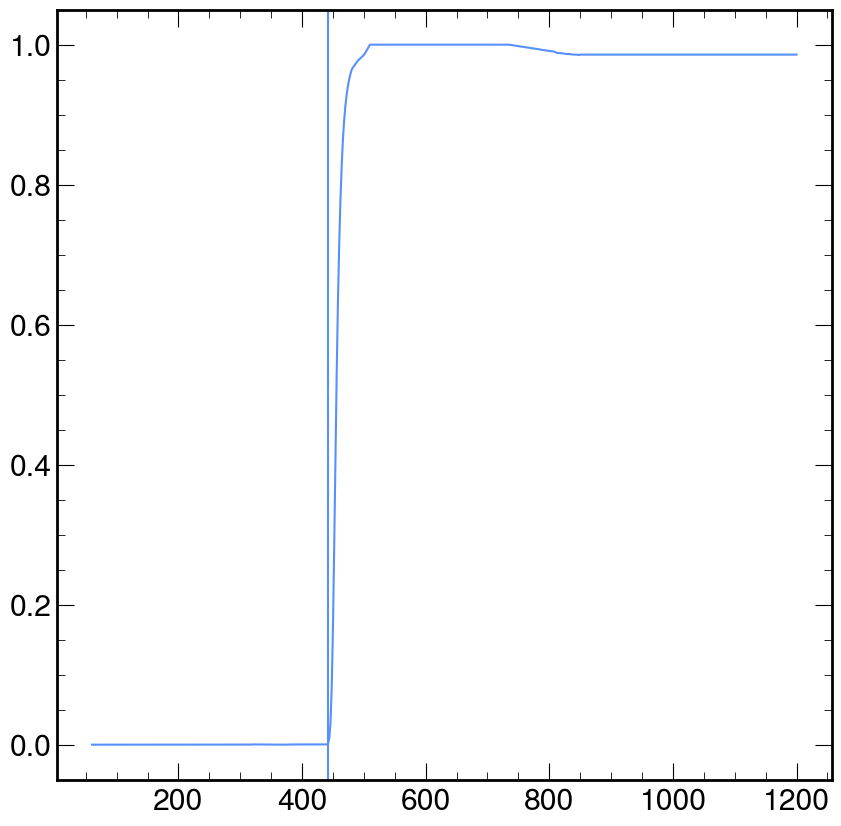

In [187]:
wvl = np.asarray([  60., 250., 252., 254., 256., 258., 260., 262., 264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286., 288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310., 312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334., 336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358., 360., 362., 364., 366., 368., 370., 372., 374., 376., 378., 380., 382., 384., 386., 388., 390., 392., 394., 396., 398., 400., 402., 404., 406., 408., 410., 412., 414., 416., 418., 420., 422., 424., 426., 428., 430., 432., 434., 436., 438., 440., 442., 444., 446., 448., 450., 452., 454., 456., 458., 460., 462., 464., 466., 468., 470., 472., 474., 476., 478., 480., 482., 484., 486., 488., 490., 492., 494., 496., 498., 500., 502., 504., 506., 508., 510., 512., 514., 516., 518., 520., 522., 524., 526., 528., 530., 532., 534., 536., 538., 540., 542., 544., 546., 548., 550., 552., 554., 556., 558., 560., 562., 564., 566., 568., 570., 572., 574., 576., 578., 580., 582., 584., 586., 588., 590., 592., 594., 596., 598., 600., 602., 604., 606., 608., 610., 612., 614., 616., 618., 620., 622., 624., 626., 628., 630., 632., 634., 636., 638., 640., 642., 644., 646., 648., 650., 652., 654., 656., 658., 660., 662., 664., 666., 668., 670., 672., 674., 676., 678., 680., 682., 684., 686., 688., 690., 692., 694., 696., 698., 700., 702., 704., 706., 708., 710., 712., 714., 716., 718., 720., 722., 724., 726., 728., 730., 732., 734., 736., 738., 740., 742., 744., 746., 748., 750., 752., 754., 756., 758., 760., 762., 764., 766., 768., 770., 772., 774., 776., 778., 780., 782., 784., 786., 788., 790., 792., 794., 796., 798., 800., 802., 804., 806., 808., 810., 812., 814., 816., 818., 820., 822., 824., 826., 828., 830., 832., 834., 836., 838., 840., 842., 844., 846., 848., 850.,1200.])

abslength = np.asarray([1.00000000e-01,1.12918341e-01,1.12847859e-01,1.12847859e-01,1.10102468e-01,1.05885986e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.12847859e-01,1.12847859e-01,1.12847859e-01,1.12918341e-01,1.12918341e-01,1.12847859e-01,1.12847859e-01,1.05885986e-01,1.00000000e-01,1.00000000e-01,1.05885986e-01,1.05885986e-01,1.05885986e-01,1.12847859e-01,1.16563699e-01,1.28604288e-01,1.29418125e-01,1.25514908e-01,1.24148969e-01,1.24148969e-01,1.24148969e-01,1.24000244e-01,1.23824232e-01,1.23824232e-01,1.23612493e-01,1.23203270e-01,1.23612493e-01,1.23612493e-01,1.23612493e-01,1.23203270e-01,1.23203270e-01,1.23203270e-01,1.20916929e-01,1.14244268e-01,1.14244268e-01,1.17029607e-01,1.12918341e-01,1.10102468e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.00000000e-01,1.17369388e-01,1.23612493e-01,1.23612493e-01,1.23612493e-01,1.23613550e-01,1.23619795e-01,1.23625580e-01,1.23634127e-01,1.23643767e-01,1.23652186e-01,1.23242285e-01,1.23244504e-01,1.23242124e-01,1.23658736e-01,1.23659453e-01,1.23659089e-01,1.23658769e-01,1.23240530e-01,1.23658104e-01,1.23240149e-01,1.23240029e-01,1.23239869e-01,1.23239670e-01,1.23239376e-01,1.23239091e-01,1.23238799e-01,1.23238538e-01,1.23238302e-01,1.23238115e-01,1.22517536e-01,1.22517381e-01,1.28247439e-01,1.57933024e-01,2.12719786e-01,2.88754447e-01,4.03133644e-01,5.66395506e-01,7.98501379e-01,1.12633428e+00,1.57818905e+00,2.17613266e+00,2.95235028e+00,3.94550611e+00,5.21376811e+00,6.79648786e+00,8.67324195e+00,1.08528083e+01,1.33558994e+01,1.61757621e+01,1.93133850e+01,2.28662089e+01,2.69245209e+01,2.98698119e+01,3.20129092e+01,3.51499444e+01,3.86069016e+01,4.22086058e+01,4.59881869e+01,4.97484957e+01,5.41746544e+01,5.98662830e+01,6.81076850e+01,8.23419936e+01,1.08502710e+02,1.65466017e+02,3.55752860e+02,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,1.00000000e+04,2.48313465e+03,1.73817428e+03,1.21056800e+03,8.74392016e+02,6.92882810e+02,5.93592263e+02,5.24159162e+02,4.42627325e+02,4.02707154e+02,3.52849244e+02,3.33551794e+02,3.05557553e+02,2.72793989e+02,2.52857002e+02,2.44096328e+02,2.27153957e+02,2.13328818e+02,2.02069671e+02,1.89813971e+02,1.83704650e+02,1.74771713e+02,1.66945985e+02,1.56516799e+02,1.50460361e+02,1.45888186e+02,1.38058184e+02,1.32900619e+02,1.29235720e+02,1.24588779e+02,1.20608613e+02,1.16661509e+02,1.12510311e+02,1.09342183e+02,1.07393739e+02,1.04290868e+02,1.02473889e+02,9.92592590e+01,9.23467674e+01,8.52260971e+01,8.30199486e+01,8.22217769e+01,8.17205920e+01,8.04341085e+01,7.85229753e+01,7.65026150e+01,7.57178478e+01,7.36804881e+01,7.39669834e+01,7.36441462e+01,7.25916714e+01,7.06876354e+01,7.11239523e+01,6.91841011e+01,6.92349190e+01,6.93713352e+01,6.77168811e+01,6.70126006e+01,6.94144310e+01,6.94144310e+01])

plt.plot(wvl, np.exp(-1/abslength))
plt.axvline(442)

In [194]:
np.sum((pmtinfo['type'][sim_all_digitid] == 3) & sim_clean_hit_mask)

4614